<a href="https://colab.research.google.com/github/regain001/Interview-Preparation/blob/master/Interview%20Prep%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Structure : Linked List**

---

`Linked List basics`

---



In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.link = None

class LinkedList:

    def createNode(self, data):
        return Node(data)

    def insertNode(self, node, data):
        if node is None:
            return self.createNode(data)

        if node is not None:
            node.link = self.insertNode(node.link, data)  ### important

        return node   ### important


def main():
    root = None;
    linkedList = LinkedList();
    root = linkedList.insertNode(root, 8);
    linkedList.insertNode(root, 7);
    linkedList.insertNode(root, 23);
    linkedList.insertNode(root, 12);
    
    ### important to understand why we use "root" instead of root.link
    while root is not None:
        print(root.data)
        root = root.link


if __name__ == "__main__":
    main()


8
7
23
12


---
`Singly LinkedList (main functions) :`

*   `reverseLinkedListByRecursion`
*   `reverseLinkedListWithoutRecursion`
*   `insertIntoAParticularPosition`
*   `deleteFromAParticularPosition`
*   `findNthNodeFromTheEnd`
*   `findMiddleNodeFromLinkedList`
*   `createALoopInLinkedList`
*   `containsLoopInALinkedList`
*   `findStartNodeInALoop`
*   `removeLoopFromLinkedList`

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.link = None


class LinkedList:
    node = None;

    def createNode(self, data):
        return Node(data)

    def insert(self, node, data):
        if node is None:
            return self.createNode(data)
        if node is not None:
            node.link = self.insert(node.link, data);
        return node;

    def lenght(self, node):
        lenght = 0
        while node is None:
            lenght += 1
            node = node.link
        return lenght

    def printLinkedList(self, node):
        while node is not None:
            print(node.data, end='-> ')
            node = node.link

        print('None')

    def printLinkedListInReverseOrder(self, node):
        if node is None: return  # Base case
        self.reverseLinkedListByRecursion(node.link)
        print(node.data)

    def linkedListToArray(self, node):
        arr = []
        while node is not None:
            arr.append(node.data)
            node = node.link
        return arr;

    def printReverseLinkedListByConvertingIntoArrayList(self, node):
        arr = self.linkedListToArray(node)
        print("\nreverseLinkedList:::::")
        length = len(arr) - 1
        while node is not None:
            node.data = arr[length]  ### reverse the array
            print(node.data)
            node = node.link
            length = length - 1
        return node

    # ****** reverse the linked list with recursion ******
    # Algo Study Link: https://www.youtube.com/watch?v=KYH83T4q6Vs
    def reverseLinkedListByRecursionAndReturn(self, node):
        # Base case
        if node.link is None: return node
        ret_node = self.reverseLinkedListByRecursion(node.link)
        node.link.link = node
        node.link = None
        return ret_node

    # ****** reverse the linked list without recursion [Leetcode #206] ******
    # Algo Study link: https://www.youtube.com/watch?v=jY-EUKXYT20&list=PL6Zs6LgrJj3tDXv8a_elC6eT_4R5gfX4d&index=38
    def reverseLinkedListWithoutRecursion(self, head_ref):
        current = head_ref
        previous = None
        next = None

        while current is not None:
            next = current.link
            current.link = previous
            previous = current
            current = next

        return previous

    # ****** Insert a node in a Singly Linked List at a given position ******
    def insertIntoAParticularPosition(self, head_ref, pos, data):
        new_node = self.createNode(data)
        if (pos == 1):
            new_node.link = head_ref
            head_ref = new_node

        else:
            count = 1
            previous_node = head_ref
            while count < pos - 1:
                count = count + 1
                previous_node = previous_node.link

            next_node = previous_node.link
            previous_node.link = new_node
            new_node.link = next_node

        return head_ref

    # ****** Delete a node in a Singly Linked List at a given position ******
    def deleteFromAParticularPosition(self, head_ref, pos):
        if pos == 1:
            head_ref = head_ref.link
        else:
            count = 1
            previous_node = head_ref
            while count < pos - 1:
                previous_node = previous_node.link
                count = count + 1

            previous_node.link = previous_node.link.link

        return head_ref

    # ****** Find nth node from the end of a Singly Linked List ******
    def findNthNodeFromTheEnd(self, head, n):
        refPtr = head
        mainPtr = head
        count = 0

        while (count < n):
            refPtr = refPtr.link
            count = count + 1

        while (refPtr != None):
            refPtr = refPtr.link
            mainPtr = mainPtr.link

        return mainPtr

    # ****** Find middle node in a Singly Linked List ******
    # Algo Study link: https://www.youtube.com/watch?v=DYpEpZzNmiA&list=PL6Zs6LgrJj3tDXv8a_elC6eT_4R5gfX4d&index=36
    def findMiddleNodeFromLinkedList(self, head):
        slowPtr = head
        fastPtr = head

        while (fastPtr != None):
            slowPtr = slowPtr.link
            fastPtr = fastPtr.link.link

        return slowPtr

    # ****** create a loop in a Singly Linked List ******
    def createALoopInLinkedList(self):
        first = self.createNode(1)
        second = self.createNode(2)
        third = self.createNode(3)
        fourth = self.createNode(4)
        fifth = self.createNode(5)
        sixth = self.createNode(6)

        head = first
        first.link = second
        second.link = third
        third.link = fourth
        fourth.link = fifth
        fifth.link = sixth
        sixth.link = third

        return head

    # ****** detect a loop in a Singly Linked List ******
    # Using Floyd's Cycle Detection algorithm
    def containsLoopInALinkedList(self, head):
        slowPtr = head
        fastPtr = head

        while (fastPtr is not None and fastPtr.link is not None):
            slowPtr = slowPtr.link
            fastPtr = fastPtr.link.link

            if slowPtr == fastPtr:
                return True

        return False

    # ***** find start of a loop in a Singly Linked List *****
    # Using Floyd's Cycle Detection algorithm
    # Algo Study link: https://www.youtube.com/watch?v=HXNJSkh5kFo&list=PL6Zs6LgrJj3tFNF3RvHDAvZcgOrvGWNRi&index=32
    def findStartNodeInALoop(self, head):
        slowPtr = head
        fastPtr = head

        while(fastPtr is not None and fastPtr.link is not None):
            slowPtr = slowPtr.link
            fastPtr = fastPtr.link.link

            if(slowPtr == fastPtr):
                return self.getStartingNode(head, slowPtr)

    def getStartingNode(self, head, slowPtr):
        temp = head
        while(temp != slowPtr):
            temp = temp.link
            slowPtr = slowPtr.link

        return temp.data

    # ***** remove a loop from a Singly Linked List *****
    # Using Floyd's Cycle Detection algorithm
    # Algo Study link: https://www.youtube.com/watch?v=LWDVM_kgvdE&list=PL6Zs6LgrJj3tFNF3RvHDAvZcgOrvGWNRi&index=33
    def removeLoopFromLinkedList(self, head):
        slowPtr = head
        fastPtr = head

        while(fastPtr is not None and fastPtr.link is not None):
            slowPtr = slowPtr.link
            fastPtr = fastPtr.link.link

            if(slowPtr == fastPtr):
                self.removeLoop(head, slowPtr)
                return head

    def removeLoop(self, head, slowPtr):
        temp = head
        while(temp.link != slowPtr.link):
            temp = temp.link
            slowPtr = slowPtr.link

        slowPtr.link = None

In [ ]:
def main():
    root = None
    linkedList = LinkedList()
    root = linkedList.insert(root, 1);
    linkedList.insert(root, 2)
    linkedList.insert(root, 3)
    linkedList.insert(root, 4)

    node = root

    # Just print
    print('\n----------------------------------\n')
    linkedList.printLinkedList(node);

    # Just print in reverse order
    # print('\n----printLinkedListInReverseOrder----\n')
    # linkedList.printLinkedListInReverseOrder(node);

    # print('\n----printReverseLinkedListByConvertingIntoArrayList----\n')
    # print('printReverseLinkedListByConvertingIntoArrayList()')
    # linkedList.printReverseLinkedListByConvertingIntoArrayList(root);

    # print('\n----reverseLinkedListByRecursionAndReturn----\n')
    # node1 = linkedList.reverseLinkedListByRecursionAndReturn(root)
    # linkedList.printLinkedList(node1);

    # print('\n----insertIntoAParticularPosition----\n')
    # node1 = linkedList.insertIntoAParticularPosition(root, 1, 9)
    # linkedList.printLinkedList(node1);

    # print('\n----deleteFromAParticularPosition----\n')
    # node1 = linkedList.deleteFromAParticularPosition(root, 3)
    # linkedList.printLinkedList(node1);

    # print('\n----reverseLinkedListWithoutRecursion----\n')
    # node1 = linkedList.reverseLinkedListWithoutRecursion(node)
    # linkedList.printLinkedList(node1);

    # print('\n----findNthNodeFromTheEnd----\n')
    # node1 = linkedList.findNthNodeFromTheEnd(node, 3)
    # print(node1.data)

    # print('\n----findMiddleNodeFromLinkedList----\n')
    # node1 = linkedList.findMiddleNodeFromLinkedList(node)
    # print(node1.data)

    print('\n----detectLoopInALinkedList----\n')
    node1 = linkedList.createALoopInLinkedList()
    is_loop_found = linkedList.containsLoopInALinkedList(node1)
    print(is_loop_found)

    print('\n----findStartNodeInALoop----\n')
    node1 = linkedList.createALoopInLinkedList()
    print(linkedList.findStartNodeInALoop(node1))

    print('\n----removeLoopFromLinkedList----\n')
    node1 = linkedList.createALoopInLinkedList()
    temp = linkedList.removeLoopFromLinkedList(node1)
    linkedList.printLinkedList(temp);

if __name__ == "__main__":
    main()


----------------------------------

1-> 2-> 3-> 4-> None

----detectLoopInALinkedList----

True

----findStartNodeInALoop----

3

----removeLoopFromLinkedList----

1-> 2-> 3-> 4-> 5-> 6-> None


---
`Doubly LinkedList basics :`
*   `insertNodeAtTheBeginning`
*   `insertNodeAtTheEnd`
*   `deleteNodeAtTheBeginning`
*   `deleteNodeAtTheEnd`



In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.prev = None
        self.next = None

class DoublyLinkedList:
    head = None
    tail = None

    def createNewNode(self, data):
        return Node(data)

    def insertNodeAtTheBeginning(self, head, data):
        new_node = Node(data)
        if head is None:
            new_node.next = head
            self.head = self.tail = new_node
        else:
            new_node.next = head
            head.prev = new_node
            self.head = new_node

        return self.head

    def insertNodeAtTheEnd(self, head, data):
        new_node = Node(data)
        if head is None:
            new_node.next = head
            self.head = self.tail = new_node
        else:
            temp = head
            while(temp.next != None):
                temp = temp.next

            temp.next = new_node
            new_node.prev = temp
            self.tail = new_node

        return self.head

    def deleteNodeAtTheBeginning(self, head):
        if head is not None:
            self.head = head.next

    def deleteNodeAtTheEnd(self, head):
        if head is not None:
            temp = head
            while(temp.next.next != None):
                temp = temp.next

            temp.next.prev = None
            temp.next = None



    def print(self, head):
        temp = head
        while (temp != None):
            print(temp.data, end='-> ')
            temp = temp.next
        print('NULL')

    def printReverse(self, tail):
        temp = tail
        while (temp != None):
            print(temp.data, end='-> ')
            temp = temp.prev
        print('NULL')


def main():
    head = None
    dll = DoublyLinkedList()
    head = dll.insertNodeAtTheBeginning(head, 1)
    dll.insertNodeAtTheEnd(head, 2)
    dll.insertNodeAtTheEnd(head, 3)
    dll.insertNodeAtTheBeginning(head, 0)
    print("---printAsUsual---")
    dll.print(dll.head)
    print("---printReverse---")
    dll.printReverse(dll.tail)
    dll.deleteNodeAtTheBeginning(dll.head)
    print("---deleteNodeAtTheBeginning---")
    dll.print(dll.head)
    dll.deleteNodeAtTheEnd(dll.head)
    print("---deleteNodeAtTheEnd---")
    dll.print(dll.head)

if __name__ == "__main__":
    main()

---printAsUsual---
0-> 1-> 2-> 3-> NULL
---printReverse---
3-> 2-> 1-> 0-> NULL
---deleteNodeAtTheBeginning---
1-> 2-> 3-> NULL
---deleteNodeAtTheEnd---
1-> 2-> NULL


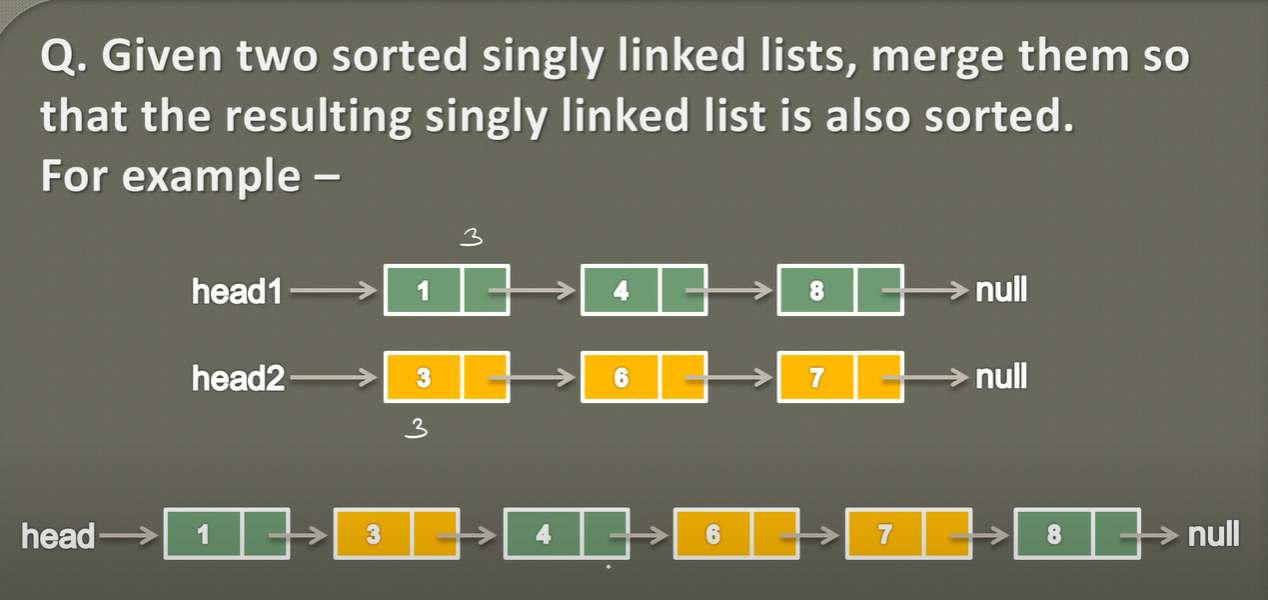

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None


class SinglyLinkedList:
    def createNode(self, data):
        return Node(data)


    def insertNewNode(self, node, data):
        if node is None:
            return self.createNode(data)
        if node is not None:
            node.next = self.insertNewNode(node.next, data)
        return node


    def print(self, node):
        while node is not None:
            print(node.data, end='-> ')
            node = node.next
        print("None")


# ***** Merge Two Sorted Lists | Leetcode #21 *****
# Algo Study link: https://www.youtube.com/watch?v=IMWiPqoneT4&list=PL6Zs6LgrJj3tDXv8a_elC6eT_4R5gfX4d&index=69
def mergeTwoSortedSinglyList(a, b):
    ### Created dummyNode to avoid NULL pointer exception
    dummyNode = Node(0)
    tail = dummyNode

    while (a != None and b != None):
        if a.data <= b.data:
            tail.next = a
            a = a.next
        else:
            tail.next = b
            b = b.next

        tail = tail.next

    if (a is None):
        tail.next = b
    if (b is None):
        tail.next = a

    return dummyNode.next


def main():
    singlyLinkedList = SinglyLinkedList()
    root = None
    root = singlyLinkedList.insertNewNode(root, 1)
    singlyLinkedList.insertNewNode(root, 3)
    singlyLinkedList.insertNewNode(root, 5)
    singlyLinkedList.insertNewNode(root, 7)
    singlyLinkedList.insertNewNode(root, 9)
    firstLinkedListHead = root

    root = None
    root = singlyLinkedList.insertNewNode(root, 2)
    singlyLinkedList.insertNewNode(root, 4)
    singlyLinkedList.insertNewNode(root, 6)
    secondLinkedListHead = root

    print("\n\n---firstLinkedList---")
    singlyLinkedList.print(firstLinkedListHead)

    print("\n\n---secondLinkedList---")
    singlyLinkedList.print(secondLinkedListHead)

    print("\n\n---mergeTwoSortedSinglyList---")
    sortedList = mergeTwoSortedSinglyList(firstLinkedListHead, secondLinkedListHead)

    singlyLinkedList.print(sortedList)


if __name__ == "__main__":
    main()



---firstLinkedList---
1-> 3-> 5-> 7-> 9-> None


---secondLinkedList---
2-> 4-> 6-> None


---mergeTwoSortedSinglyList---
1-> 2-> 3-> 4-> 5-> 6-> 7-> 9-> None


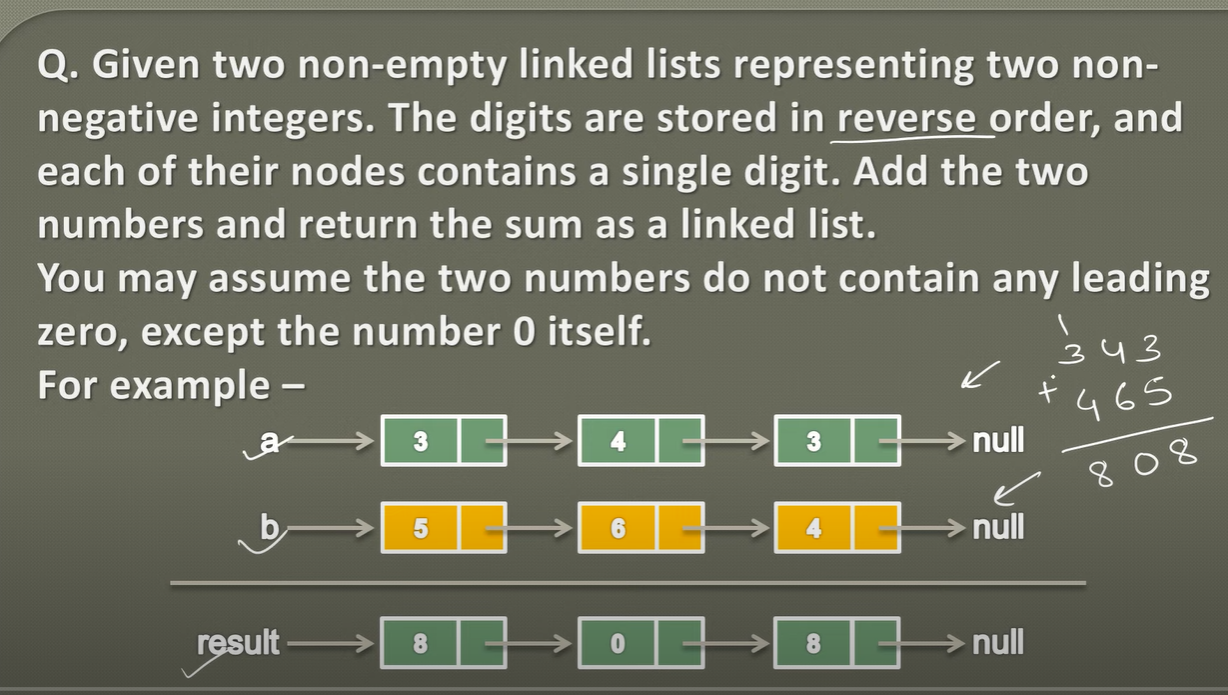

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None


class SinglyLinkedList:

    def createNode(self, data):
        return Node(data)

    def insertNewNode(self, node, data):
        if node is None:
            return self.createNode(data)
        if node is not None:
            node.next = self.insertNewNode(node.next, data)
        return node

    def print(self, node):
        while node is not None:
            print(node.data, end='->')
            node = node.next


def addTwoNumbers(a, b):
    dummyNode = Node(0)
    tail = dummyNode
    carry = 0

    while a is not None or b is not None:
        x = a.data if a is not None else 0
        y = b.data if b is not None else 0
        sum = x+y+carry
        # perform integer division using // operator.
        carry = sum//10

        tail.next = Node(sum%10)
        tail = tail.next

        if a is not None:
            a = a.next
        if b is not None:
            b = b.next

    if carry>0:
        tail.next = Node(carry)

    return dummyNode.next


def main():
    singlyLinkedList = SinglyLinkedList()
    root = None
    root = singlyLinkedList.insertNewNode(root, 7)
    singlyLinkedList.insertNewNode(root, 6)
    singlyLinkedList.insertNewNode(root, 9)
    firstLinkedListHead = root

    root = None
    root = singlyLinkedList.insertNewNode(root, 6)
    singlyLinkedList.insertNewNode(root, 4)
    secondLinkedListHead = root

    print("\n\n---firstLinkedList---")
    singlyLinkedList.print(firstLinkedListHead)
    print("\n\n---secondLinkedList---")
    singlyLinkedList.print(secondLinkedListHead)

    print("\n\n---addTwoNumbers---")
    sortedList = addTwoNumbers(firstLinkedListHead, secondLinkedListHead)

    singlyLinkedList.print(sortedList)


if __name__ == "__main__":
    main()




---firstLinkedList---
7->6->9->

---secondLinkedList---
6->4->

---addTwoNumbers---
3->1->0->1->

# **Data Structure : Tree**
---

---
1.   **Recursive Preorder traversal of a Binary Tree**
2.   **Recursive Inorder traversal of a Binary Tree**
3.   **Recursive Postorder traversal of a Binary Tree**
---

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None


class Tree:
    ## Root - Left - Right
    def preOrder(self, node):
        if node is None : return
        print(node.data, end=' ')
        self.preOrder(node.left)
        self.preOrder(node.right)

    ## Left - Root - Right
    def inOrder(self, node):
        if node is None : return
        self.inOrder(node.left)
        print(node.data, end=' ')
        self.inOrder(node.right)

    ## Left - Right - Root 
    def postOrder(self, node):
        if node is None : return
        self.postOrder(node.left)
        self.postOrder(node.right)
        print(node.data, end=' ')

def main():
    first = Node(1)
    second = Node(2)
    third = Node(3)
    fourth = Node(4)
    fifth = Node(5)
    sixth = Node(6)

    first.left = second # 2 <- 1
    first.right = third # 2 <- 1 -> 3
    second.left = fourth # 4 <- 2
    second.right = fifth # 4 <- 2 -> 5
    third.left = sixth # 6 <- 3

    tree = Tree()
    print("---Preorder traversal---")
    tree.preOrder(first)
    print("\n---Inorder traversal---")
    tree.inOrder(first)
    print("\n---Postorder traversal---")
    tree.postOrder(first)


if __name__ == "__main__":
    main()

---Preorder traversal---
1 2 4 5 3 6 
---Inorder traversal---
4 2 5 1 6 3 
---Postorder traversal---
4 5 2 6 3 1 

---
1.   **Iterative Preorder traversal of a Binary Tree**
2.   **Iterative Inorder traversal of a Binary Tree**
3.   **Iterative Inorder traversal of a Binary Tree Leetcode-94**
4.   **Iterative Postorder traversal of a Binary Tree**
---


In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None


class Tree:

    # ****** Iterative Preorder traversal of a Binary Tree ******
    # Algo Study Link: https://www.youtube.com/watch?v=VaIaJMeNWtU&list=PL6Zs6LgrJj3tDXv8a_elC6eT_4R5gfX4d&index=103
    ## Root - Left - Right
    def iterativePreOrderTraversal(self, root):
        if root is None: return
        stack = []
        stack.append(root)

        while stack:  # stack is not empty
            temp = stack.pop()
            print(temp.data, end=', ')

            if temp.right is not None:
                stack.append(temp.right)
            if temp.left is not None:
                stack.append(temp.left)

    # ****** Iterative Inorder traversal of a Binary Tree ******
    # Algo Study Link: https://www.youtube.com/watch?v=uMTrIjP_0Gw&list=PL6Zs6LgrJj3tDXv8a_elC6eT_4R5gfX4d&index=104
    ## Left - Root - Right
    def iterativeInOrderTraversal(self, root):
        if root is None: return
        temp = root
        stack = []

        while stack or temp is not None:  # stack is not empty

            if temp is not None:
                stack.append(temp)
                temp = temp.left
            else:
                temp = stack.pop()
                print(temp.data, end=', ')
                temp = temp.right

    # ****** Iterative Inorder traversal of a Binary Tree Leetcode - 94 ******
    # Algo Study Link: https://leetcode.com/problems/binary-tree-inorder-traversal/solutions/?languageTags=python
    def iterativeInorderTraversalLeetcode(self, root):
        if root is None : return
        stack = []
        ret_list = []
        temp = root

        while stack or temp is not None:

            if temp is not None:
                stack.append(temp)
                temp = temp.left
            else:
                temp = stack.pop()
                ret_list.append(temp.data)
                temp = temp.right
        return ret_list


    # ****** Iterative Postorder traversal of a Binary Tree ******
    # Algo Study Link: https://www.youtube.com/watch?v=uigaktgcQWU&list=PL6Zs6LgrJj3tDXv8a_elC6eT_4R5gfX4d&index=107
    ## Left - Right - Root
    def iterativePostOrderTraversal(self, root):
        if root is None: return
        current = root
        stack = []

        while stack or current is not None: # stack is not empty
            if current is not None:
                stack.append(current)
                current = current.left
            else:
                ## stack[-1] returns top of the value of the stack without popping
                temp = stack[-1].right
                if temp is None:
                    temp = stack.pop()
                    print(temp.data, end=', ')
                    if stack and temp == stack[-1].right: # stack is not empty
                        temp = stack.pop()
                        print(temp.data, end=', ')
                else:
                    current = temp


def main():
    first = Node(1)
    second = Node(2)
    third = Node(3)
    fourth = Node(4)
    fifth = Node(5)
    sixth = Node(6)

    first.left = second  # 2 <- 1
    first.right = third  # 2 <- 1 -> 3
    second.left = fourth  # 4 <- 2
    second.right = fifth  # 4 <- 2 -> 5
    third.left = sixth  # 6 <- 3

    tree = Tree()
    print("---Preorder traversal---")
    tree.iterativePreOrderTraversal(first)

    print("\n\n---Inorder traversal---")
    tree.iterativeInOrderTraversal(first)

    print("\n\n---Inorder traversal leetcode---")
    print(tree.iterativeInorderTraversalLeetcode(first))

    print("\n\n---Postorder traversal---")
    tree.iterativePostOrderTraversal(first)

if __name__ == "__main__":
    main()


---Preorder traversal---
1, 2, 4, 5, 3, 6, 

---Inorder traversal---
4, 2, 5, 1, 6, 3, 

---Inorder traversal leetcode---
[4, 2, 5, 1, 6, 3]


---Postorder traversal---
4, 5, 2, 6, 3, 1, 

---
1.   **Level order traversal of a Binary Tree**
2.   **Level order traversal of a Binary Tree Leetcode-102**
---




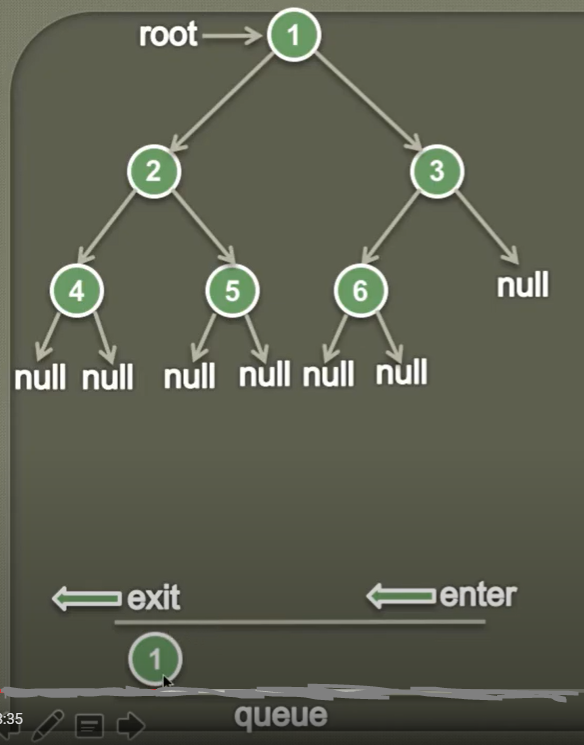

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None


class Tree:

    # ****** Level order traversal of a Binary Tree ******
    # Algo Study Link: https://www.youtube.com/watch?v=hXAqTO7VqUQ&list=PL6Zs6LgrJj3tDXv8a_elC6eT_4R5gfX4d&index=107
    def levelOrderTraversal(self, root):
        if root is None : return
        queue = []
        queue.append(root)

        while len(queue) > 0 :
            temp = queue.pop(0)
            print(temp.data, end= ', ')
            if temp.left is not None:
                queue.append(temp.left)
            if temp.right is not None:
                queue.append(temp.right)
    
    # ****** Level order traversal of a Binary Tree Leetcode - 102 ******
    # Algo Study Link: https://leetcode.com/problems/binary-tree-level-order-traversal/description/
    def levelOrderTraversalLeetcode(self, root):
        if root is None : return
        queue = []
        queue.append(root)
        ret_list = []

        while len(queue) > 0:
            ans = []
            l = len(queue)
            for i in range(l):
                temp = queue.pop(0)
                ans.append(temp.data)

                if temp.left is not None:
                    queue.append(temp.left)
                if temp.right is not None:
                    queue.append(temp.right)

            ret_list.append(ans)

        return ret_list

def main():
    first = Node(1)
    second = Node(2)
    third = Node(3)
    fourth = Node(4)
    fifth = Node(5)
    sixth = Node(6)

    first.left = second  # 2 <- 1
    first.right = third  # 2 <- 1 -> 3
    second.left = fourth  # 4 <- 2
    second.right = fifth  # 4 <- 2 -> 5
    third.left = sixth  # 6 <- 3

    tree = Tree()

    print("\n\n---Level order traversal---")
    tree.levelOrderTraversal(first)

    print("\n\n---Level order traversal leetcode---")
    print(tree.levelOrderTraversalLeetcode(first))
if __name__ == "__main__":
    main()



---Level order traversal---
1, 2, 3, 4, 5, 6, 

---Level order traversal leetcode---
[[1], [2, 3], [4, 5, 6]]


---
**Find Maximum value in a Binary Tree**

---

In [ ]:
import math

class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None


class Tree:

    # ****** Find Maximum value in a Binary Tree ******
    # Algo Study Link: https://www.youtube.com/watch?v=XZZbTtLUGiM&list=PL6Zs6LgrJj3tDXv8a_elC6eT_4R5gfX4d&index=108
    def findMax(self, root):
        if root is None : return -math.inf
        result = root.data

        left = self.findMax(root.left)
        right = self.findMax(root.right)

        if left > result: result = left
        if right > result: result = right

        return result


def main():
    first = Node(6)
    second = Node(4)
    third = Node(9)
    fourth = Node(1)
    fifth = Node(8)
    sixth = Node(7)
    seven = Node(10)
    first.left = second  # 4 <- 6
    first.right = third  # 4 <- 6 -> 9
    second.left = fourth  # 1 <- 4
    second.right = fifth  # 1 <- 4 -> 5
    third.left = sixth  # 7 <- 9
    third.right = seven # 7 <- 9 -> 10

    tree = Tree()

    print("\n\n---Find Max value in Binary Search Tree---")
    print(tree.findMax(first))

if __name__ == "__main__":
    main()




---Find Max value in Binary Search Tree---
10


---
**Validate Binary Search Tree | Leetcode #98**

---


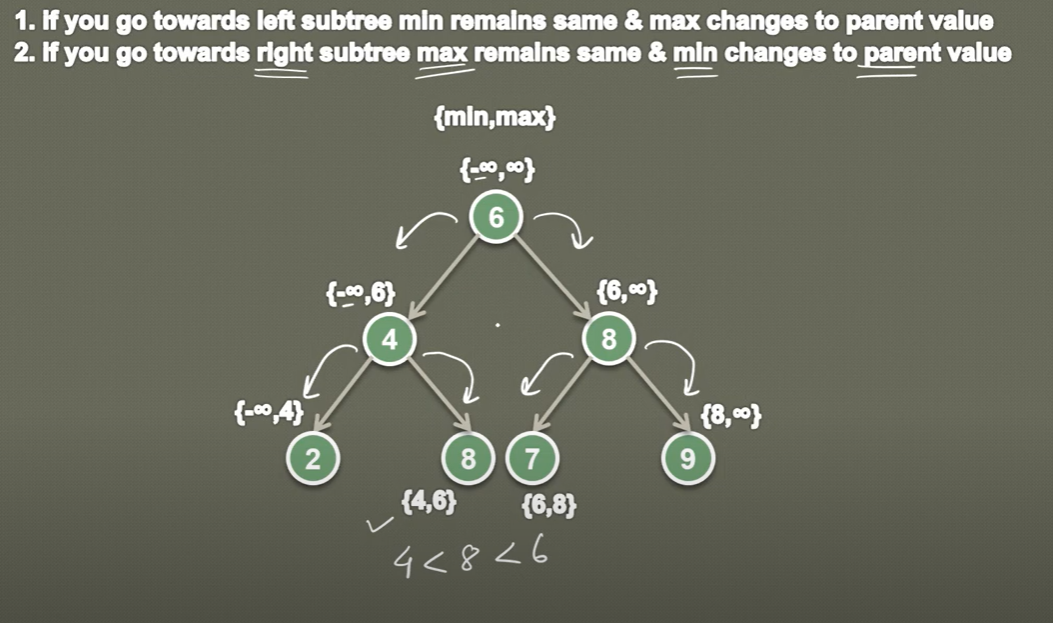

In [ ]:
import math

class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class Tree:

    # ****** Validate Binary Search Tree | Leetcode #98  ******
    # Algo Study Link: https://www.youtube.com/watch?v=ACoLBU0nPAw&list=PL6Zs6LgrJj3tDXv8a_elC6eT_4R5gfX4d&index=117
    def isValidBST(self, root, min, max):
        if root is None: return True

        if root.data <= min or root.data >= max:
            return False

        left = self.isValidBST(root.left, min, root.data)
        if left:
            right = self.isValidBST(root.right, root.data, max)
            return right

        return False

def main():
    first = Node(6)
    second = Node(4)
    third = Node(9)
    fourth = Node(1)
    fifth = Node(8)
    sixth = Node(7)
    seven = Node(10)
    first.left = second  # 4 <- 6
    first.right = third  # 4 <- 6 -> 9
    second.left = fourth  # 1 <- 4
    second.right = fifth  # 1 <- 4 -> 8 (For Node(8), this tree is not valid BST)
    third.left = sixth  # 7 <- 9
    third.right = seven # 7 <- 9 -> 10

    tree = Tree()

    print("\n\n---BST Validate leetcode---")
    print(tree.isValidBST(first, -math.inf, math.inf))

if __name__ == "__main__":
    main()




---BST Validate leetcode---
False


---
**Priority Queue (Max Heap Implementation)**

---

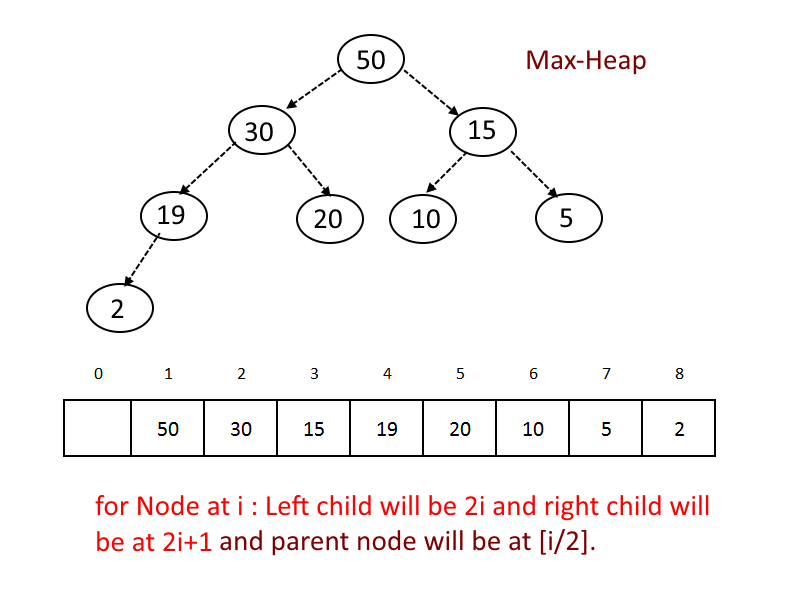

In [ ]:
class PriorityQueueMaxHeap:

    global HEAP

    def __init__(self):
        global HEAP
        HEAP = []
        # HEAP's index 0 is None
        HEAP.append(None)

    # ****** How to insert in a Max Heap | Bottom-Up Reheapfy ******
    # Algo Study Link: https://www.youtube.com/watch?v=xIk0gEIVoZY&list=PL6Zs6LgrJj3tDXv8a_elC6eT_4R5gfX4d&index=125
    def insert(self, val):
        global HEAP
        HEAP.append(val)
        last_element_index = len(HEAP) - 1
        self.swim(last_element_index)

    def swim(self, k):
        global HEAP
        ## parent of k th element's indices k//2
        ## IMPORTANT :: k>1
        while k>1 and HEAP[k//2] < HEAP[k]:
            self.swapIndices(k//2, k)
            k = k//2

    # ****** How to delete max element in a Max Heap | Top-Down Reheapfy ******    
    # Algo Study Link: https://www.youtube.com/watch?v=VRehtixv1S8&list=PL6Zs6LgrJj3tDXv8a_elC6eT_4R5gfX4d&index=128
    def deleteMax(self):
        global HEAP
        max = HEAP[1]
        self.swapIndices(1, len(HEAP) - 1)
        HEAP.pop()
        self.sink(1)

    def sink(self, k):
        global HEAP
        heap_length = len(HEAP) - 1
        while k*2 <= heap_length:
            # left child index: k*2, || SO, left child = j
            # right child index: k*2 + 1 || SO, right child = j+1
            j = k*2
            if j+1 <= heap_length and HEAP[j] < HEAP[j+1]:
                j = j+1

            # if parent is greater than child, then exit
            if HEAP[k] >= HEAP[j]: break
            self.swapIndices(k,j)
            k=j

    def swapIndices(self, x, y):
        global HEAP
        temp = HEAP[x]
        HEAP[x] = HEAP[y]
        HEAP[y] = temp

def main():
    global HEAP
    pq = PriorityQueueMaxHeap()
    pq.insert(4)
    pq.insert(5)
    pq.insert(2)
    pq.insert(6)
    pq.insert(1)
    pq.insert(3)
    # HEAP = [None,9,3,6,2,1,5,4]
    print("\n\n---PriorityQueueAfterInsertAll---")
    print(HEAP)

    pq.deleteMax()
    print("\n\n---DeleteMax()---")
    print(HEAP)

    pq.deleteMax()
    print("\n\n---DeleteMax()---")
    print(HEAP)


if __name__ == "__main__":
    main()



---PriorityQueueAfterInsertAll---
[None, 6, 5, 3, 4, 1, 2]


---DeleteMax()---
[None, 5, 4, 3, 2, 1]


---DeleteMax()---
[None, 4, 2, 3, 1]


In [ ]:
def depthFirstSearchIterative(graph, source):
    stack = [source]

    while len(stack) > 0:
        current = stack.pop()
        print(current, end=', ')
        for neighbour in graph[current]:
            stack.append(neighbour)


def breadthFirstSearchIterative(graph, source):
    queue = [source]

    while len(queue) > 0:
        current = queue.pop(0)
        print(current, end=', ')
        for neighbour in graph[current]:
            queue.append(neighbour)


def depthFirstSearchRecursive(graph, source):
    print(source, end=', ')
    ## It works as a base case. No neighbour means no traversal
    for neighbour in graph[source]:
        depthFirstSearchRecursive(graph, neighbour)

## But there is no shch things like recursive BFS

def main():
    graph = {
        'a': ['b', 'c'],
        'b': ['d'],
        'c': ['e'],
        'd': ['f'],
        'e': [],
        'f': []
    }
    print('Depth First Search (Iterative)')
    depthFirstSearchIterative(graph, 'a')

    print('\n\n-----------------------------')

    print('Depth First Search (Recursive)')
    depthFirstSearchRecursive(graph, 'a')

    print('\n\n-----------------------------')

    print('Breadth First Search (Iterative)')
    breadthFirstSearchIterative(graph, 'a')


if __name__ == "__main__":
    main()

Depth First Search (Iterative)
a, c, e, b, d, f, 

-----------------------------
Depth First Search (Recursive)
a, b, d, f, c, e, 

-----------------------------
Breadth First Search (Iterative)
a, b, c, d, e, f, 

---
**has path problem**

Write a function, hasPath, that takes in an object representing the adjacency list of a directed acyclic graph and two nodes (src, dst). The function should return a boolean indicating whether or not there exists a directed path between the source and destination nodes.

Hey. This is our first graph problem, so you should be liberal with watching the Approach and Walkthrough. Be productive, not stubborn. -AZ

```
test_00:
const graph = {
  f: ['g', 'i'],
  g: ['h'],
  h: [],
  i: ['g', 'k'],
  j: ['i'],
  k: []
};
hasPath(graph, 'f', 'k'); // true

test_01:
const graph = {
  f: ['g', 'i'],
  g: ['h'],
  h: [],
  i: ['g', 'k'],
  j: ['i'],
  k: []
};
hasPath(graph, 'f', 'j'); // false

```



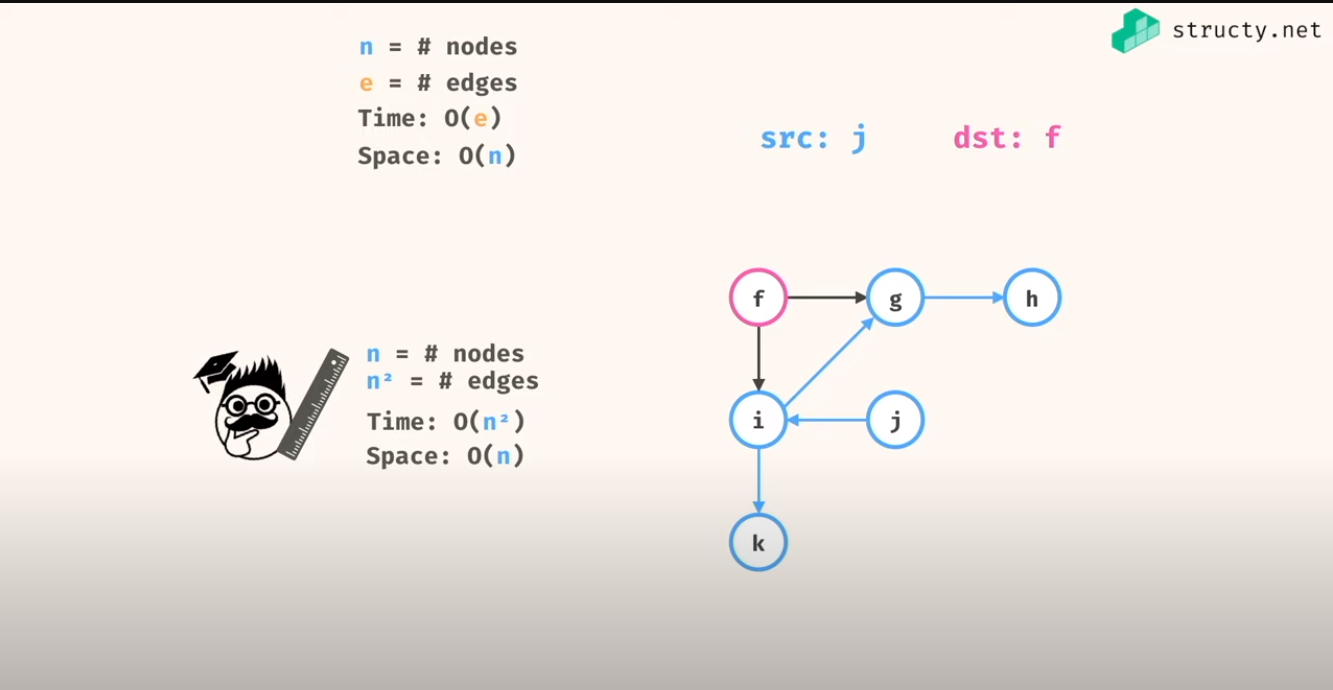

In [ ]:
## Directed acyclic graph solving by using DFS (in recursive way)
def hasPathProblemDFS(graph, src, dest):
    if src == dest: return True
    for neighbour in graph[src]:
        if hasPathProblemDFS(graph, neighbour, dest) is True:
            return True

    return False

## Directed acyclic graph solving by using BFS (iterative way)
def hasPathProblemBFS(graph, src, dest):
    queue = [src]
    while len(queue) > 0:
        current = queue.pop(0)
        if current == dest: return True
        for neighbour in graph[current]:
            queue.append(neighbour)

    return False

def main():
    graph = {
        'f': ['g', 'i'],
        'g': ['h'],
        'h': [],
        'i': ['g', 'k'],
        'j': ['i'],
        'k': []
    }
    print('hasPathProblemDFS :', hasPathProblemDFS(graph, 'f', 'j'))
    print('-----------------------------')
    print('hasPathProblemBFS :', hasPathProblemBFS(graph, 'i', 'h'))

if __name__ == "__main__":
    main()

hasPathProblemDFS : False
-----------------------------
hasPathProblemBFS : True


---

**undirected path**

Write a function, undirectedPath, that takes in an array of edges for an undirected graph and two nodes (nodeA, nodeB). The function should return a boolean indicating whether or not there exists a path between nodeA and nodeB.

```
test_01:
const edges = [
  ['i', 'j'],
  ['k', 'i'],
  ['m', 'k'],
  ['k', 'l'],
  ['o', 'n']
];
undirectedPath(edges, 'j', 'm'); // -> true

test_02:
const edges = [
  ['i', 'j'],
  ['k', 'i'],
  ['m', 'k'],
  ['k', 'l'],
  ['o', 'n']
];
undirectedPath(edges, 'k', 'o'); // -> false

```



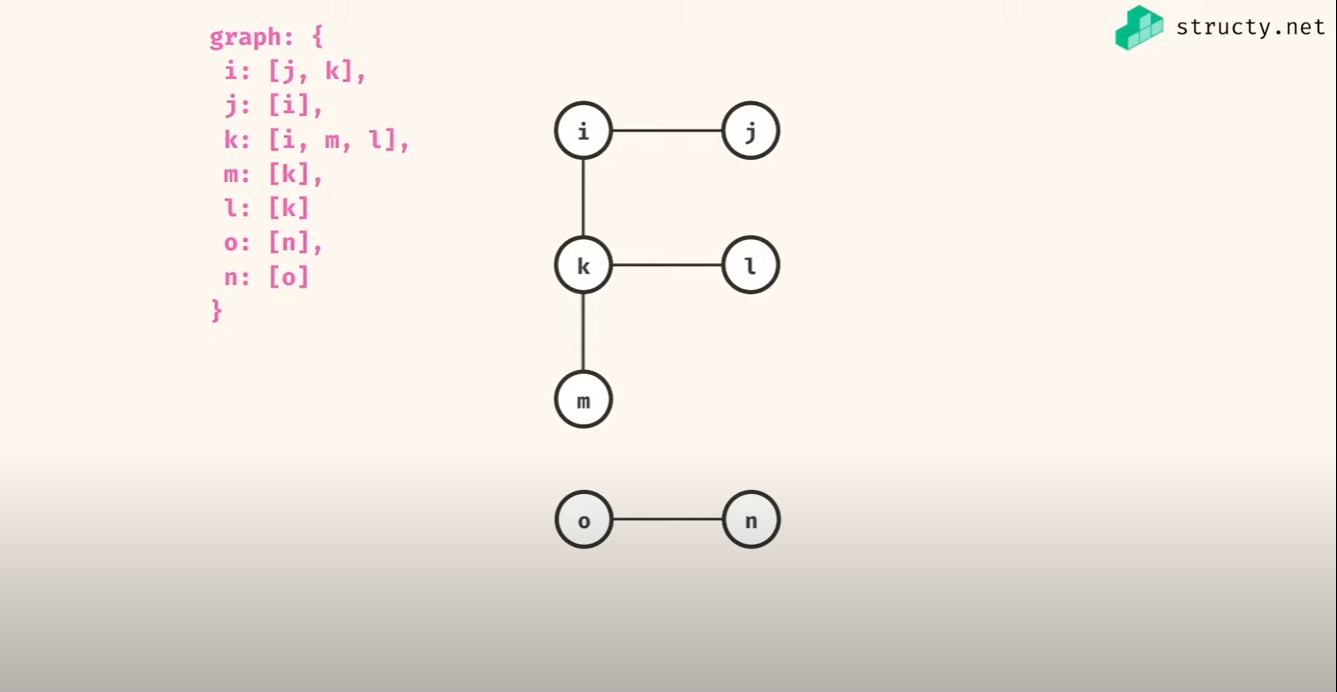

In [ ]:
# Undirected graph solving by using DFS (recursive way)
# Undirected graph has always been a cycle between two nodes

def undirectedGraphHasPathDFS(edges, nodeA, nodeB):
    graph = bulidGraph(edges)
    visited = set()
    return hasPath(graph, nodeA, nodeB, visited)


def hasPath(graph, src, dst, visited): # DFS Algorithm
    if src == dst: return True
    if src in visited: return False
    visited.add(src)

    for neighbour in graph[src]:
        if hasPath(graph, neighbour, dst, visited) == True:
            return True

    return False


def bulidGraph(edges):
    graph = {}

    for edge in edges:
        a, b = edge  # Using tuple unpacking to assign elements of a list to variables
        if graph.get(a) is None: graph[a] = []
        if graph.get(b) is None: graph[b] = []
        graph[a].append(b)
        graph[b].append(a)

    return graph


def main():
    edges = [
        ['i', 'j'],
        ['k', 'i'],
        ['m', 'k'],
        ['k', 'l'],
        ['o', 'n']
    ]
    print('hasPathProblemDFS (j to m) :', undirectedGraphHasPathDFS(edges, 'j', 'm'))
    print('-----------------------------')
    print('hasPathProblemDFS (k to o) :', undirectedGraphHasPathDFS(edges, 'k', 'o'))

if __name__ == "__main__":
    main()


hasPathProblemDFS (j to m) : True
-----------------------------
hasPathProblemDFS (k to o) : False


Write a function, **connected_components_count**, that takes in the **adjacency list of an undirected graph**. The function should return the number of connected components within the graph.

```
test_00:
connected_components_count({
  0: [8, 1, 5],
  1: [0],
  5: [0, 8],
  8: [0, 5],
  2: [3, 4],
  3: [2, 4],
  4: [3, 2]
}) # -> 2
test_01:
connected_components_count({
  1: [2],
  2: [1,8],
  6: [7],
  9: [8],
  7: [6, 8],
  8: [9, 7, 2]
}) # -> 1
```

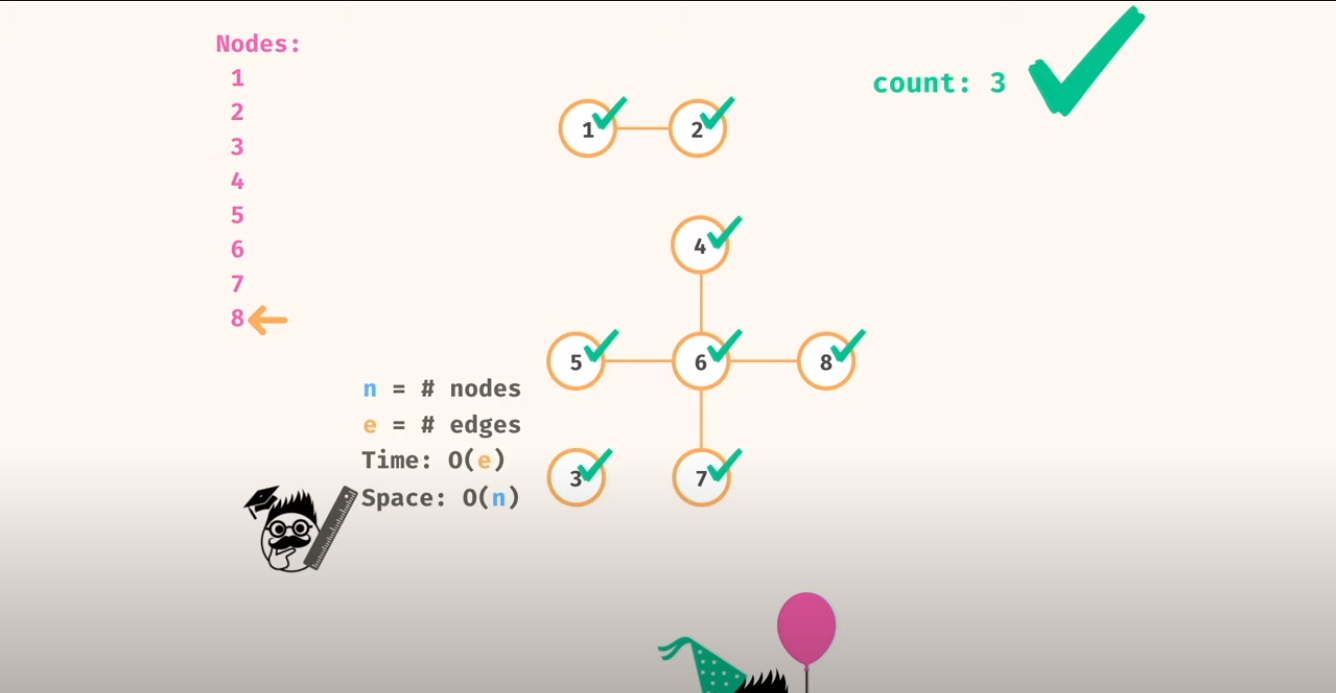

In [ ]:
# Undirected graph solving by using DFS (recursive way)
# Undirected graph has always been a cycle between two nodes

def connected_components_count(graph):
    visited = set()
    count = 0
    for node in graph:
        if explore(graph, node, visited) == True:
            count = count + 1

    return count

def explore(graph, node, visited):  # DFS Algorithm
    if node in visited: return False
    visited.add(node)

    for neighbour in graph[node]:
        explore(graph, neighbour, visited)

    return True


def main():
    graph01 = {
      0: [8, 1, 5],
      1: [0],
      5: [0, 8],
      8: [0, 5],
      2: [3, 4],
      3: [2, 4],
      4: [3, 2]
    }
    graph02 = {
      1: [2],
      2: [1,8],
      6: [7],
      9: [8],
      7: [6, 8],
      8: [9, 7, 2]
    }
    print('connected_components_count :', connected_components_count(graph01))
    print('-----------------------------')
    print('connected_components_count :', connected_components_count(graph02))

if __name__ == "__main__":
    main()

connected_components_count : 2
-----------------------------
connected_components_count : 1


---
**largest component**

Write a function, **largest_component**, that takes in the **adjacency list of an undirected graph**. The function should return the number of connected components within the graph.

```
test_00:
largest_component({
  0: [8, 1, 5],
  1: [0],
  5: [0, 8],
  8: [0, 5],
  2: [3, 4],
  3: [2, 4],
  4: [3, 2]
}) # -> 4

test_01:
largest_component({
  1: [2],
  2: [1,8],
  6: [7],
  9: [8],
  7: [6, 8],
  8: [9, 7, 2]
}) # -> 6

```



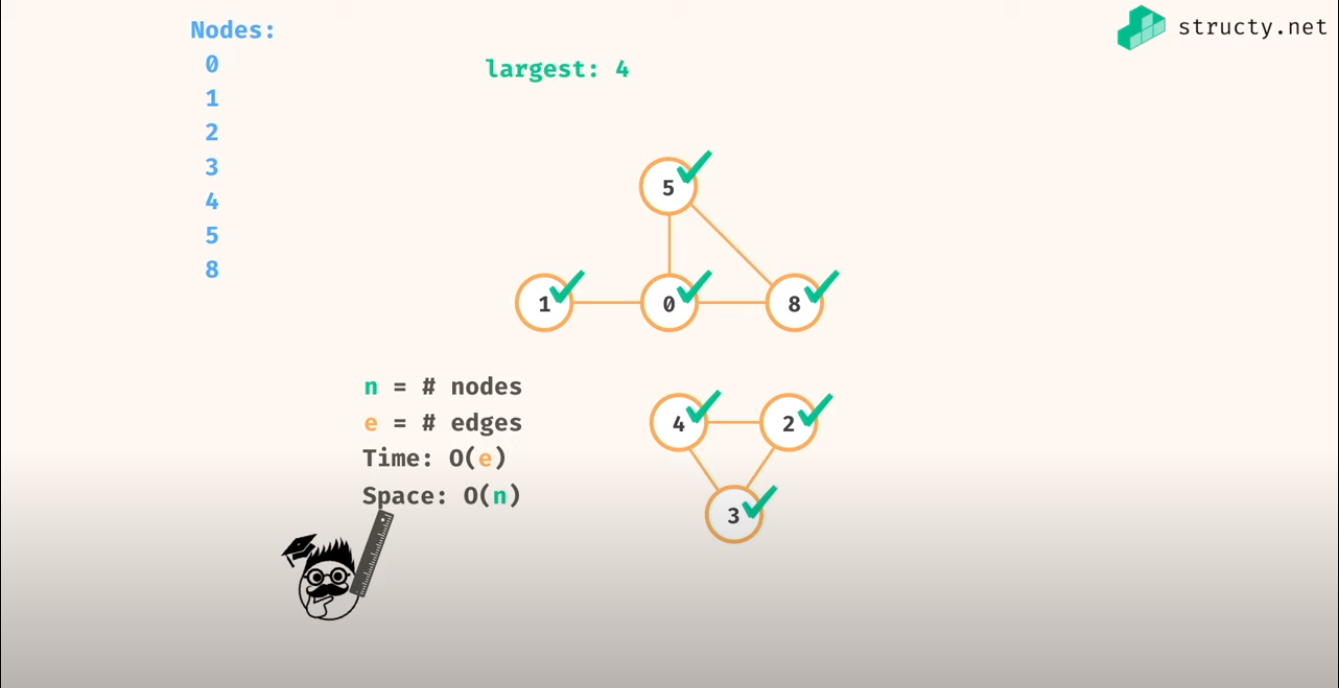

In [ ]:
# Undirected graph solving by using DFS (recursive way)
# Undirected graph has always been a cycle between two nodes

def largest_component(graph):
    visited = set()
    largest = 0
    for node in graph:
        size = exploreSize(graph, node, visited)
        if size > largest : largest = size

    return largest

def exploreSize(graph, node, visited):  # DFS Algorithm
    if node in visited: return 0
    visited.add(node)

    size = 1

    for neighbour in graph[node]:
        size = size + exploreSize(graph, neighbour, visited)

    return size


def main():
    graph01 = {
      0: [8, 1, 5],
      1: [0],
      5: [0, 8],
      8: [0, 5],
      2: [3, 4],
      3: [2, 4],
      4: [3, 2]
    }
    graph02 = {
      1: [2],
      2: [1,8],
      6: [7],
      9: [8],
      7: [6, 8],
      8: [9, 7, 2]
    }
    print('largest_component :', largest_component(graph01))
    print('-----------------------')
    print('largest_component :', largest_component(graph02))

if __name__ == "__main__":
    main()


largest_component : 4
-----------------------
largest_component : 6


---
**shortest path**

Write a function, **shortest_path**, that takes in the adjacency list of an undirected graph. The function should return the number of connected components within the graph.node_A, node_B). The function should return the length of the shortest path between A and B. Consider the length as the number of edges in the path, not the number of nodes. If there is no path between A and B, then return -1.

```
test_00:
edges = [
  ['w', 'x'],
  ['x', 'y'],
  ['z', 'y'],
  ['z', 'v'],
  ['w', 'v']
]
shortest_path(edges, 'w', 'z') # -> 2

test_01:
edges = [
  ['a', 'c'],
  ['a', 'b'],
  ['c', 'b'],
  ['c', 'd'],
  ['b', 'd'],
  ['e', 'd'],
  ['g', 'f']
]
shortest_path(edges, 'b', 'g') # -> -1
```

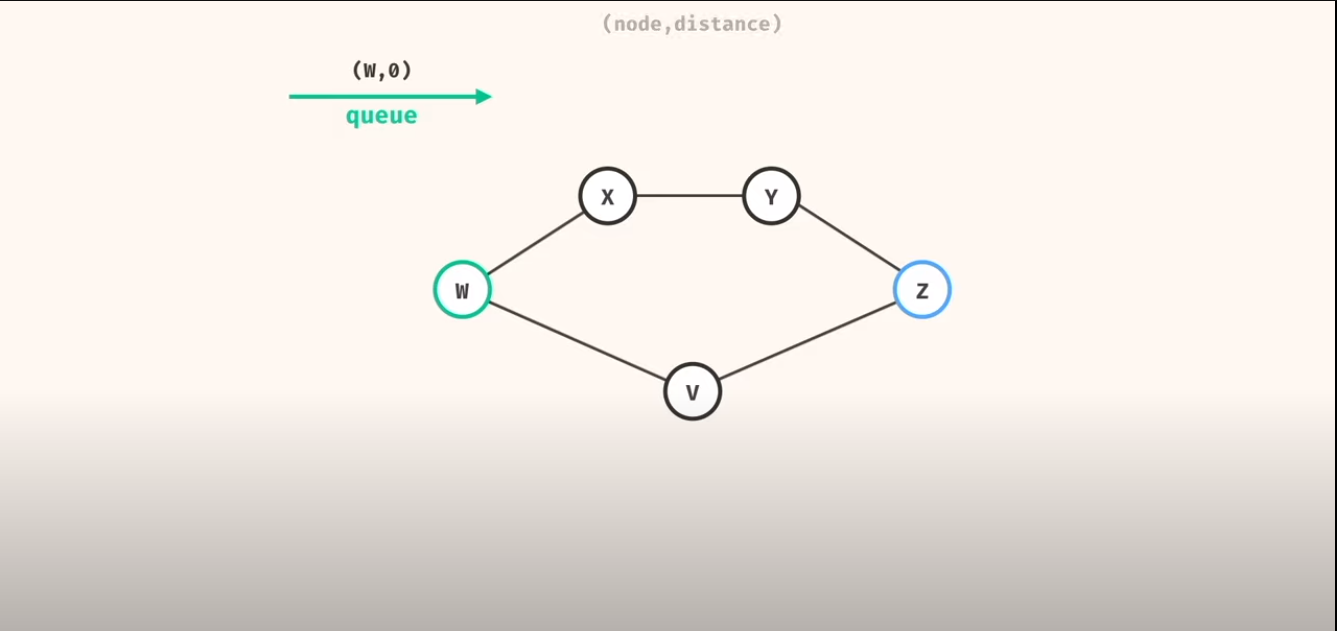

In [ ]:
def shortest_path(edges, src, dst):
    graph = buildGraph(edges)
    visited = set([src])
    queue = [[src, 0]]

    while len(queue) > 0:
        node, distance = queue.pop(0)
        if node == dst: return distance

        for neighbour in graph[node]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append([neighbour, distance + 1])

    return -1

def buildGraph(edges):  # for undirected graph
    graph = {}
    for edge in edges:
        a, b = edge
        if graph.get(a) is None: graph[a] = []
        if graph.get(b) is None: graph[b] = []

        graph[a].append(b)
        graph[b].append(a)

    return graph


def main():
    edges01 = [
        ['w', 'x'],
        ['x', 'y'],
        ['z', 'y'],
        ['z', 'v'],
        ['w', 'v']
    ]
    edges02 = [
        ['a', 'c'],
        ['a', 'b'],
        ['c', 'b'],
        ['c', 'd'],
        ['b', 'd'],
        ['e', 'd'],
        ['g', 'f']
    ]
    edges03 = [
        ['m', 'n'],
        ['n', 'o'],
        ['o', 'p'],
        ['p', 'q'],
        ['t', 'o'],
        ['r', 'q'],
        ['r', 's']
    ]

    print('shortest_path :', shortest_path(edges01, 'w', 'z'))
    print('-----------------')
    print('shortest_path :', shortest_path(edges02, 'b', 'g'))
    print('-----------------')
    print('shortest_path :', shortest_path(edges03, 'm', 's'))


if __name__ == "__main__":
    main()


shortest_path : 2
-----------------
shortest_path : -1
-----------------
shortest_path : 6


---
**island count**
Write a function, **island_count**, that takes in the adjacency list of an undirected graph. The function should return the number of connected components within the graph.

```
test_00:
grid = [
  ['W', 'L', 'W', 'W', 'W'],
  ['W', 'L', 'W', 'W', 'W'],
  ['W', 'W', 'W', 'L', 'W'],
  ['W', 'W', 'L', 'L', 'W'],
  ['L', 'W', 'W', 'L', 'L'],
  ['L', 'L', 'W', 'W', 'W'],
]
island_count(grid) # -> 3

test_01:
grid = [
  ['L', 'W', 'W', 'L', 'W'],
  ['L', 'W', 'W', 'L', 'L'],
  ['W', 'L', 'W', 'L', 'W'],
  ['W', 'W', 'W', 'W', 'W'],
  ['W', 'W', 'L', 'L', 'L'],
]
island_count(grid) # -> 4
```

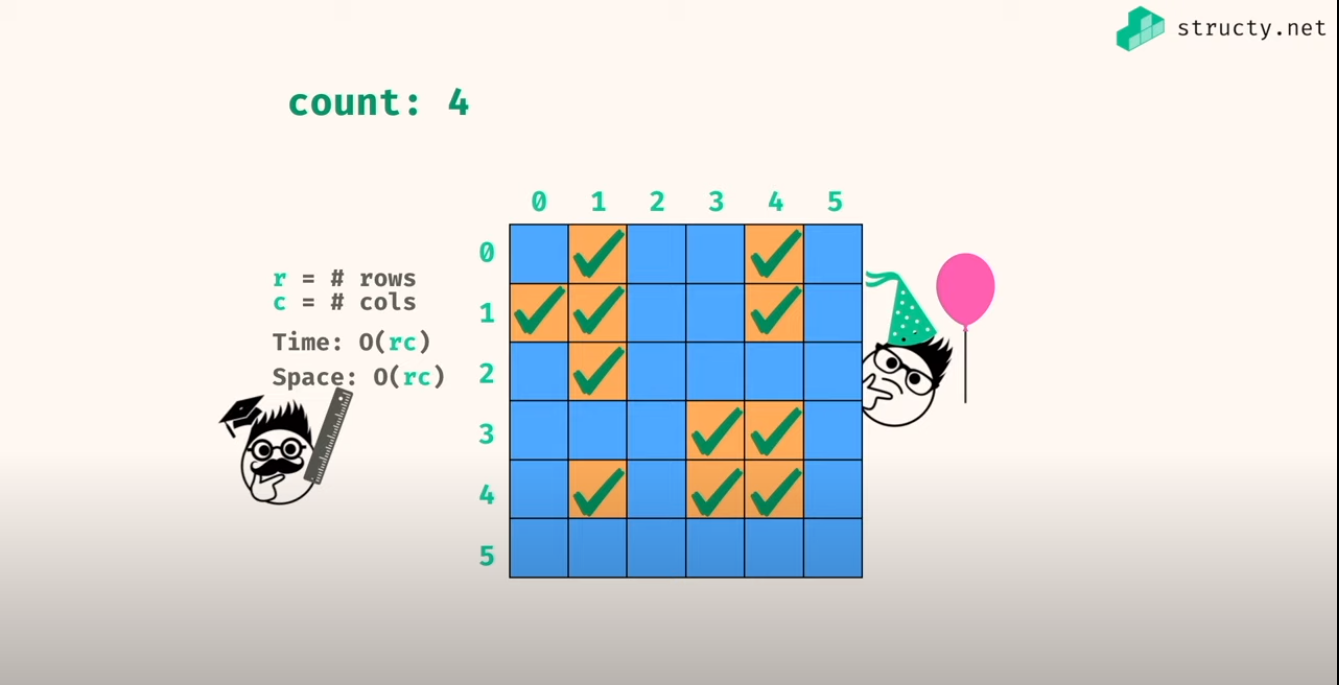

In [ ]:
def island_count(grid):
    visited = set()
    count = 0
    for r in range(len(grid)):
        for c in range(len(grid[0])):
            if explore(grid, r, c, visited) is True:
                count += 1
    return count

def explore(grid, r, c, visited):

    rowInbounds = r >= 0 and r < len(grid)
    colInbounds = c >= 0 and c <len(grid[0])
    if not rowInbounds or not colInbounds: return False

    # pos = f"{r},{c}"
    pos = (r,c) # tuples
    if pos in visited: return False
    visited.add(pos)

    if grid[r][c] == 'W': return False

    explore(grid, r+1, c, visited)
    explore(grid, r-1, c, visited)
    explore(grid, r, c+1, visited)
    explore(grid, r, c-1, visited)

    return True


def main():
    grid01 = [
        ['W', 'L', 'W', 'W', 'W'],
        ['W', 'L', 'W', 'W', 'W'],
        ['W', 'W', 'W', 'L', 'W'],
        ['W', 'W', 'L', 'L', 'W'],
        ['L', 'W', 'W', 'L', 'L'],
        ['L', 'L', 'W', 'W', 'W'],
    ]
    grid02 = [
        ['L', 'W', 'W', 'L', 'W'],
        ['L', 'W', 'W', 'L', 'L'],
        ['W', 'L', 'W', 'L', 'W'],
        ['W', 'W', 'W', 'W', 'W'],
        ['W', 'W', 'L', 'L', 'L'],
    ]

    print('island_count :', island_count(grid01))
    print('-----------------')
    print('island_count :', island_count(grid02))


if __name__ == "__main__":
    main()


island_count : 3
-----------------
island_count : 4


---
**minimum island**

Write a function, **minimum_island**, that takes in a grid containing Ws and Ls. W represents water and L represents land. The function should return the number of islands on the grid. An island is a vertically or horizontally connected region of land.

You may assume that the grid contains at least one island.
```
test_00:
grid = [
  ['W', 'L', 'W', 'W', 'W'],
  ['W', 'L', 'W', 'W', 'W'],
  ['W', 'W', 'W', 'L', 'W'],
  ['W', 'W', 'L', 'L', 'W'],
  ['L', 'W', 'W', 'L', 'L'],
  ['L', 'L', 'W', 'W', 'W'],
]
minimum_island(grid) # -> 2

test_01:
grid = [
  ['L', 'W', 'W', 'L', 'W'],
  ['L', 'W', 'W', 'L', 'L'],
  ['W', 'L', 'W', 'L', 'W'],
  ['W', 'W', 'W', 'W', 'W'],
  ['W', 'W', 'L', 'L', 'L'],
]
minimum_island(grid) # -> 1
```

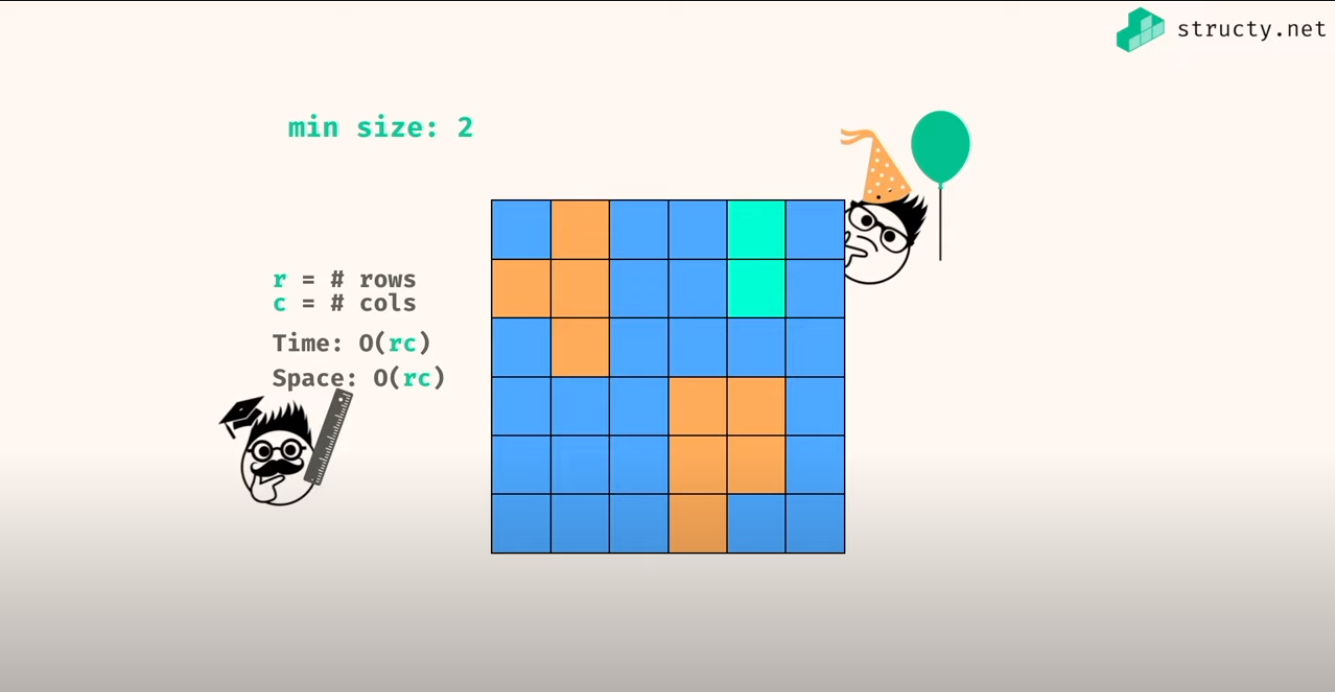

In [ ]:
from math import inf

def minimum_island(grid):
    visited = set()
    min_size = inf
    for r in range(len(grid)):
        for c in range(len(grid[0])):
            size = explore(grid, r, c, visited)
            ## size > 0, because island must have one valid region
            if size > 0 and size < min_size:
                min_size = size

    return min_size

def explore(grid, r, c, visited):
    row_inbounds = r >= 0 and r < len(grid)
    col_inbounds = c >=0 and c < len(grid[0])
    if not row_inbounds or not col_inbounds: return 0

    pos = (r,c)
    if pos in visited: return 0
    visited.add(pos)

    if grid[r][c] == 'W': return 0

    size = 1
    size += explore(grid, r+1, c, visited)
    size += explore(grid, r-1, c, visited)
    size += explore(grid, r, c+1, visited)
    size += explore(grid, r, c-1, visited)

    return size

def main():
    grid01 = [
        ['W', 'L', 'W', 'W', 'W'],
        ['W', 'L', 'W', 'W', 'W'],
        ['W', 'W', 'W', 'L', 'W'],
        ['W', 'W', 'L', 'L', 'W'],
        ['L', 'W', 'W', 'L', 'L'],
        ['L', 'L', 'W', 'W', 'W'],
    ]
    grid02 = [
        ['L', 'W', 'W', 'L', 'W'],
        ['L', 'W', 'W', 'L', 'L'],
        ['W', 'L', 'W', 'L', 'W'],
        ['W', 'W', 'W', 'W', 'W'],
        ['W', 'W', 'L', 'L', 'L'],
    ]

    print('minimum_island :', minimum_island(grid01))
    print('-----------------')
    print('minimum_island :', minimum_island(grid02))


if __name__ == "__main__":
    main()


minimum_island : 2
-----------------
minimum_island : 1
